# Message Queue based SDP - Aeneas application

1. Functions: 2
2. Message topics: 2
3. Message Queue function Triggers: 2
4. Message Queue: 1


## Experiments
1. Experiments to reduce the overall processing time of the pipeline
2. Batch workload 
3. Scenarios:
   1. Synchronous invocations in mq-function-trigger
   2. Asynchronous invocations in mq-function-trigger
   3. Asynchronous invocations in mq-function-trigger with max-inflights option in FaaS platform
   4. Asynchronous invocations with scale mq-finction-trigger with no max-inflights

In [1]:
import pandas as pd
import json
import os
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Synchronus Invocations


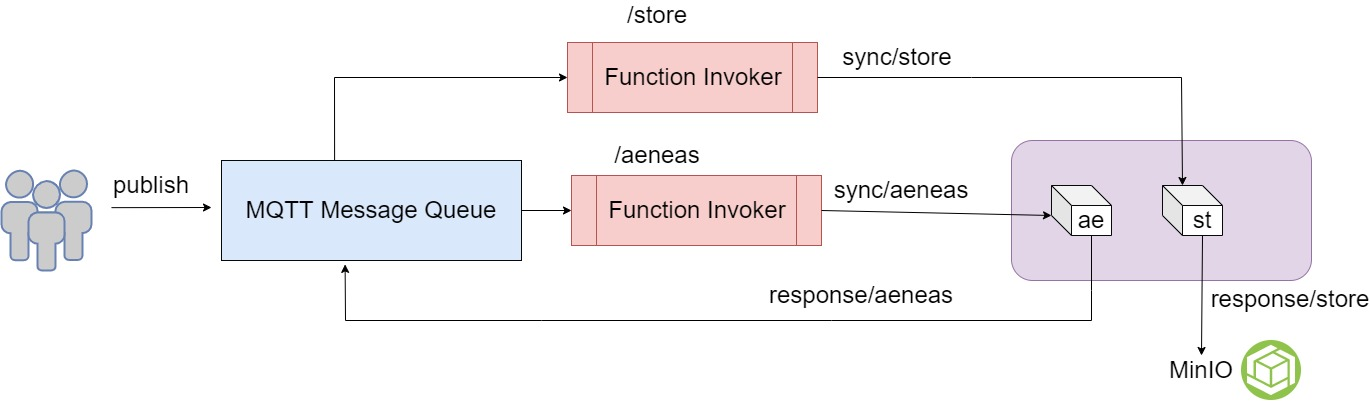

In [2]:
df=pd.read_csv("15_5_namespace_no_conf.csv")
#df2=pd.read_csv("30_1_namespace_no_conf.csv")
df

,Unnamed: 0,user,intime,outtime,aeneas,tocloud,TPT,FET,CT
0,0,1,2022-09-01 08:45:33.582,2022-09-01 08:45:38.773,4.626,0.0392,5,4.6652,0.3348
1,1,2,2022-09-01 08:45:33.588,2022-09-01 08:45:44.062,4.737,0.0401,10,4.7771,5.2229
2,2,3,2022-09-01 08:45:33.600,2022-09-01 08:45:48.831,4.712,0.0377,15,4.7497,10.2503
3,3,4,2022-09-01 08:45:33.606,2022-09-01 08:45:53.562,4.673,0.0393,19,4.7123,14.2877
4,4,5,2022-09-01 08:45:33.612,2022-09-01 08:45:58.725,4.548,0.0367,25,4.5847,20.4153
5,5,6,2022-09-01 08:45:33.621,2022-09-01 08:46:04.300,4.631,0.0390,30,4.6700,25.3300
6,6,7,2022-09-01 08:45:33.632,2022-09-01 08:46:09.040,4.518,0.0416,35,4.5596,30.4404
7,7,8,2022-09-01 08:45:33.644,2022-09-01 08:46:14.625,4.618,0.0351,40,4.6531,35.3469
8,8,9,2022-09-01 08:45:33.650,2022-09-01 08:46:19.397,4.704,0.0401,45,4.7441,40.2559
9,9,10,2022-09-01 08:45:33.657,2022-09-01 08:46:24.192,4.582,0.0417,50,4.6237,45.3763


In [3]:
df.set_index(['user'])
df['outtime']= pd.to_datetime(df['outtime'])
df['intime']= pd.to_datetime(df['intime'])
pt = []
pt_sync= (df.loc[14, 'outtime'] - df.loc[0, 'intime']).total_seconds()
pt.append(pt_sync)

Text(0, 0.5, 'Time (seconds)')

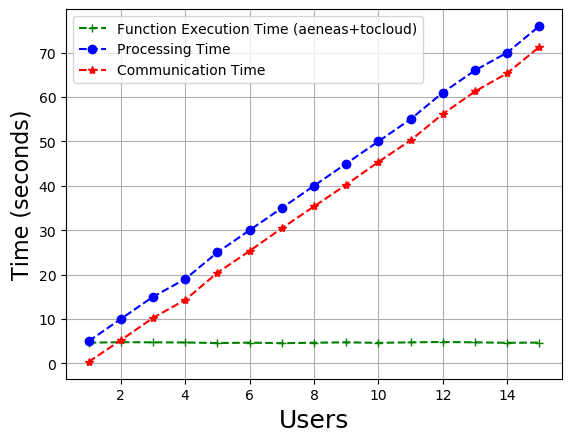

In [4]:
plt.plot(df['user'],df['FET'],linestyle='--', marker='+', color='g', label='Function Execution Time (aeneas+tocloud)')
plt.plot(df['user'],df['TPT'],  linestyle='--', marker='o', color='b', label='Processing Time')
plt.plot(df['user'],df['CT'],  linestyle='--', marker='*', color='r', label='Communication Time')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Users', fontsize=18)
plt.ylabel('Time (seconds)', fontsize=16)


In [5]:
# df=df2
# plt.plot(df['user'],df['FET'],linestyle='--', marker='+', color='g', label='Function Execution Time (aeneas+tocloud)')
# plt.plot(df['user'],df['TPT'],  linestyle='--', marker='o', color='b', label='Processing Time')
# plt.plot(df['user'],df['CT'],  linestyle='--', marker='*', color='r', label='Communication Time')
# plt.grid()
# plt.legend(loc='best')
# plt.xlabel('Users', fontsize=18)
# plt.ylabel('Time (seconds)', fontsize=16)

# Asynchronus Invocation

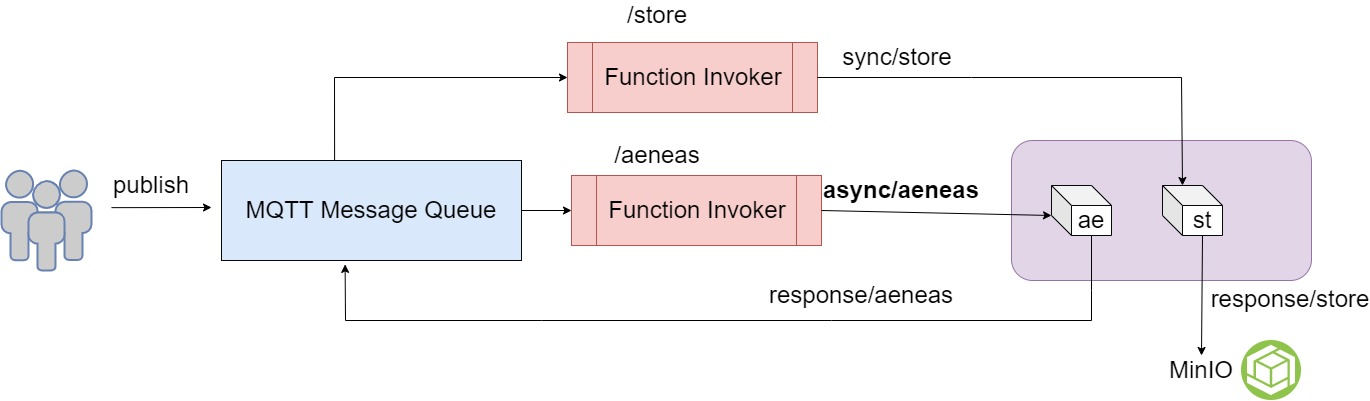

In [6]:
df_15_async=pd.read_csv("15_3_namespace_async_conf.csv")
df=df_15_async
df.set_index('user')
df['outtime']= pd.to_datetime(df['outtime'])
df['intime']= pd.to_datetime(df['intime'])
pt_sync= (df.loc[14, 'outtime'] - df.loc[0, 'intime']).total_seconds()
pt.append(pt_sync)
df

,Unnamed: 0,user,intime,outtime,aeneas,tocloud,TPT,FET,CT
0,0,1,2022-09-01 13:19:16.122,2022-09-01 13:19:22.555,4.53,0.0387,6,4.5687,1.4313
1,1,2,2022-09-01 13:19:16.128,2022-09-01 13:19:27.418,4.73,0.0394,11,4.7694,6.2306
2,2,3,2022-09-01 13:19:16.141,2022-09-01 13:19:32.196,4.49,0.0445,16,4.5345,11.4655
3,3,4,2022-09-01 13:19:16.146,2022-09-01 13:19:37.090,4.77,0.0443,20,4.8143,15.1857
4,4,5,2022-09-01 13:19:16.153,2022-09-01 13:19:46.918,4.56,0.0395,30,4.5995,25.4005
5,5,6,2022-09-01 13:19:16.161,2022-09-01 13:19:51.961,4.72,0.0418,35,4.7618,30.2382
6,6,7,2022-09-01 13:19:16.166,2022-09-01 13:19:56.963,4.75,0.0427,40,4.7927,35.2073
7,7,8,2022-09-01 13:19:16.173,2022-09-01 13:20:01.704,4.57,0.0358,45,4.6058,40.3942
8,8,9,2022-09-01 13:19:16.178,2022-09-01 13:20:06.294,4.52,0.0414,50,4.5614,45.4386
9,9,10,2022-09-01 13:19:16.189,2022-09-01 13:20:10.949,4.57,0.0405,54,4.6105,49.3895


Text(0, 0.5, 'Time (seconds)')

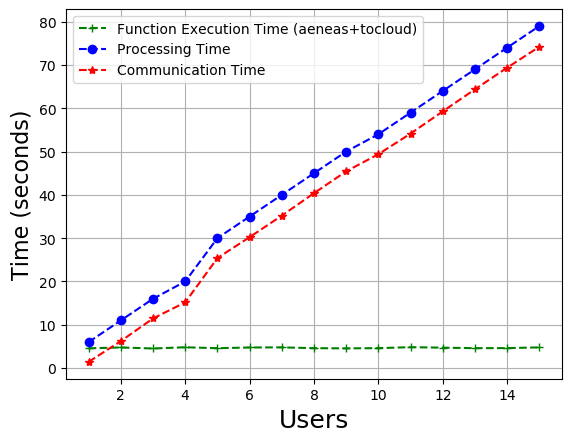

In [7]:
plt.plot(df['user'],df['FET'],linestyle='--', marker='+', color='g', label='Function Execution Time (aeneas+tocloud)')
plt.plot(df['user'],df['TPT'],  linestyle='--', marker='o', color='b', label='Processing Time')
plt.plot(df['user'],df['CT'],  linestyle='--', marker='*', color='r', label='Communication Time')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Users', fontsize=18)
plt.ylabel('Time (seconds)', fontsize=16)

# Asynchronus Invocations with max_inflight=3

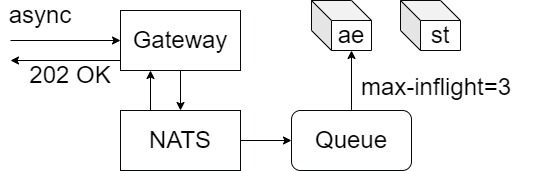

In [8]:
df_15=pd.read_csv("15_6_namespace_max_inflight.csv",index_col=0)
#df_20=pd.read_csv("20_namespace_no_conf_metrics.csv")
#df_30=pd.read_csv("30_namespace_no_conf_metrics.csv")
#df_5=pd.read_csv("../5_namespace_WITHOUT_CONF_metrics.csv")
#df_15_async=pd.read_csv("15_namespace_async_metrics.csv")
df_15
df=df_15
df.set_index('user')
df['outtime']= pd.to_datetime(df['outtime'])
df['intime']= pd.to_datetime(df['intime'])
pt_sync= (df.loc[14, 'outtime'] - df.loc[0, 'intime']).total_seconds()
pt.append(pt_sync)
df

,user,intime,outtime,aeneas,tocloud,TPT,FET,CT
0,1,2022-09-01 17:41:31.268,2022-09-01 17:41:36.579,4.88,0.0399,5,4.9199,0.0801
1,2,2022-09-01 17:41:31.274,2022-09-01 17:41:38.348,5.28,0.0419,7,5.3219,1.6781
2,3,2022-09-01 17:41:31.281,2022-09-01 17:41:38.388,5.29,0.0547,7,5.3447,1.6553
3,4,2022-09-01 17:41:31.287,2022-09-01 17:41:42.255,5.27,0.0432,10,5.3132,4.6868
4,5,2022-09-01 17:41:31.294,2022-09-01 17:41:43.336,4.91,0.0477,12,4.9577,7.0423
5,6,2022-09-01 17:41:31.303,2022-09-01 17:41:43.460,5.02,0.0348,12,5.0548,6.9452
6,7,2022-09-01 17:41:31.312,2022-09-01 17:41:47.450,5.13,0.0409,16,5.1709,10.8291
7,8,2022-09-01 17:41:31.319,2022-09-01 17:41:48.437,5.04,0.0378,17,5.0778,11.9222
8,9,2022-09-01 17:41:31.327,2022-09-01 17:41:48.593,5.06,0.0440,17,5.1040,11.8960
9,10,2022-09-01 17:41:31.335,2022-09-01 17:41:53.427,5.32,0.0392,22,5.3592,16.6408


Text(0, 0.5, 'Time (seconds)')

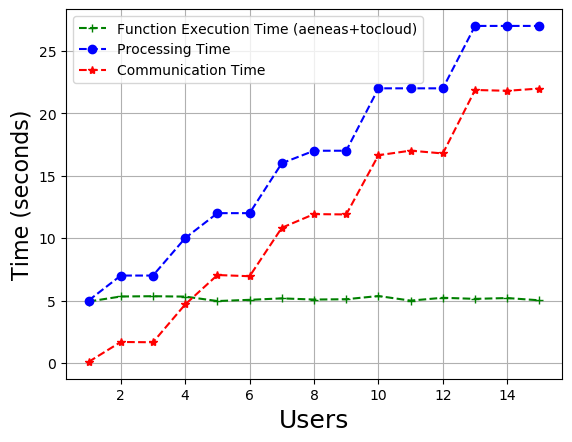

In [9]:
plt.plot(df['user'],df['FET'],linestyle='--', marker='+', color='g', label='Function Execution Time (aeneas+tocloud)')
plt.plot(df['user'],df['TPT'],  linestyle='--', marker='o', color='b', label='Processing Time')
plt.plot(df['user'],df['CT'],  linestyle='--', marker='*', color='r', label='Communication Time')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Users', fontsize=18)
plt.ylabel('Time (seconds)', fontsize=16)


# EMQX Broker + async + no max_inflight

In [10]:
#!ls *emqx*

In [11]:
df_15_emqx=pd.read_csv("15_2_emqx_testing_namespace_scaling.csv",index_col=0)
#df_15_emqx = pd.read_csv("15_emqx_testing_namespace_scaling.csv",index_col=0)
df=df_15_emqx
df.set_index('user')
df['outtime']= pd.to_datetime(df['outtime'])
df['intime']= pd.to_datetime(df['intime'])
pt_sync= (df.loc[14, 'outtime'] - df.loc[0, 'intime']).total_seconds()
pt.append(pt_sync)
df
#import numpy as np 
#intime = pd.to_timedelta(df['intime'], unit='ns').dt.total_seconds().astype(int)
#print(df.outtime.view('int64')-df.intime.view('int64'))
#print((df.outtime.astype('int64') // 10**9)-(df.intime.astype('int64') // 10**9))

,user,intime,outtime,aeneas,tocloud,TPT,FET,CT
0,1,2022-09-13 14:16:48.550,2022-09-13 14:16:54.727,5.78,0.0531,6,5.8331,0.1669
1,2,2022-09-13 14:16:48.555,2022-09-13 14:16:54.784,5.70,0.0521,6,5.7521,0.2479
2,3,2022-09-13 14:16:48.561,2022-09-13 14:16:54.830,5.86,0.0384,6,5.8984,0.1016
3,4,2022-09-13 14:16:48.567,2022-09-13 14:17:00.586,5.68,0.0597,12,5.7397,6.2603
4,5,2022-09-13 14:16:48.574,2022-09-13 14:17:00.833,6.02,0.0495,12,6.0695,5.9305
5,6,2022-09-13 14:16:48.582,2022-09-13 14:17:00.878,6.08,0.0433,12,6.1233,5.8767
6,7,2022-09-13 14:16:48.588,2022-09-13 14:17:06.213,5.55,0.0411,17,5.5911,11.4089
7,8,2022-09-13 14:16:48.597,2022-09-13 14:17:06.353,5.26,0.0391,17,5.2991,11.7009
8,9,2022-09-13 14:16:48.605,2022-09-13 14:17:06.397,5.40,0.0412,17,5.4412,11.5588
9,10,2022-09-13 14:16:48.611,2022-09-13 14:17:11.502,5.07,0.0402,22,5.1102,16.8898


Text(0, 0.5, 'Time (seconds)')

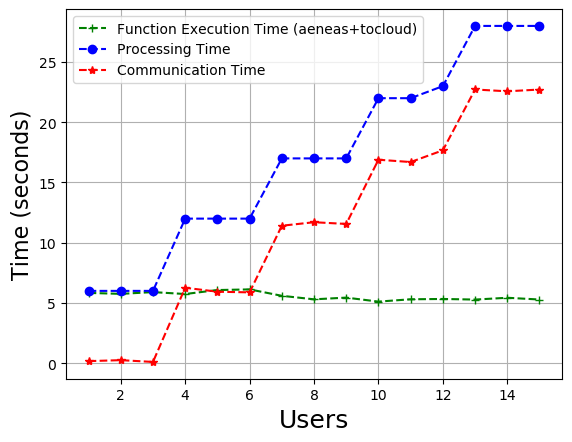

In [18]:
plt.plot(df['user'],df['FET'],linestyle='--', marker='+', color='g', label='Function Execution Time (aeneas+tocloud)')
plt.plot(df['user'],df['TPT'],  linestyle='--', marker='o', color='b', label='Processing Time')
plt.plot(df['user'],df['CT'],  linestyle='--', marker='*', color='r', label='Communication Time')
plt.grid()
plt.legend(loc='best')
plt.xlabel('Users', fontsize=18)
plt.ylabel('Time (seconds)', fontsize=16)

In [19]:
#df_30[['C_CPU','C_RAM','C_disk_read','C_disk_write','C_network_recieve','C_network_transmit']].describe()
df_15_sync=pd.read_csv("15_namespace_no_conf_metrics.csv")
df_15_async=pd.read_csv("15_namespace_async_metrics.csv")
df_15_async_max=pd.read_csv("15_namespace_async_max_inflight_metrics.csv")[:3]
df_15_emqx =pd.read_csv("15_namespace_async_max_inflight_metrics.csv").iloc[17]


# aeneas CPU usage

In [14]:
values = []
labels = ['sync','async','async-max-in','emqx-async']
values.append(df_15_sync['pod_cpu_aeneas_function'].mean())
values.append(df_15_async['pod_cpu_aeneas_function'].mean())
values.append(df_15_async_max['pod_cpu_aeneas_function'].mean())
values.append(df_15_emqx['pod_cpu_aeneas_function'])
print(values)


[1.6562694703397605, 1.6485152251023465, 0.047203379743842866, 5.033876202316549]


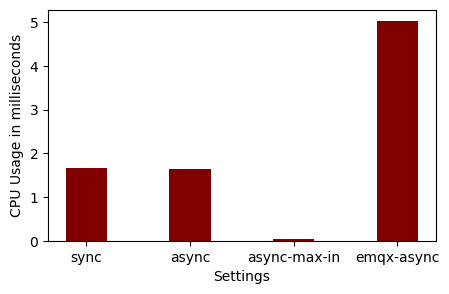

In [15]:
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(labels, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Settings")
plt.ylabel("CPU Usage in milliseconds")
plt.show()

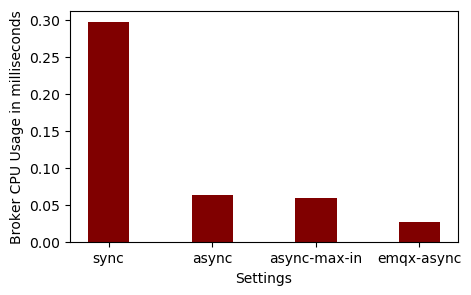

In [16]:
values = []
#labels = ['sync','async','async-max-inflight']
values.append(df_15_sync['pod_cpu_mosquitto_connector_aeneas'].mean())
values.append(df_15_async['pod_cpu_mosquitto_connector_aeneas'].mean())
values.append(df_15_async_max['pod_cpu_mosquitto_connector_aeneas'].mean())
values.append(df_15_emqx['pod_cpu_mosquitto_connector_aeneas'])
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(labels, values, color ='maroon',
        width = 0.4)
 
plt.xlabel("Settings")
plt.ylabel("Broker CPU Usage in milliseconds")
plt.show()

[76.263, 79.824, 27.611, 28.533]


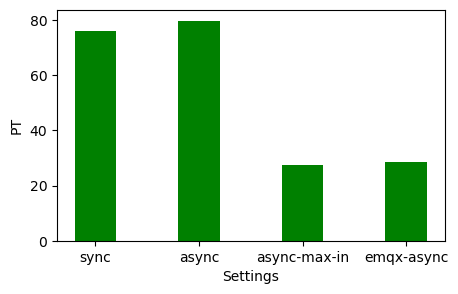

In [17]:
#labels = ['sync','async','async-max-inflight']
print(pt)
fig = plt.figure(figsize = (5, 3))
 
# creating the bar plot
plt.bar(labels, pt, color ='green',
        width = 0.4)
 
plt.xlabel("Settings")
plt.ylabel("PT")
plt.show()

# Scaling 
## 1. CPU and RAM based scaling
## 2. Capacity based scaling 
## 3. Request per second


# Horizontal Pod and Vertical Pod Scaling 